<a href="https://colab.research.google.com/github/rodrigoakios/TCC_Data-Science-e-Analytic/blob/main/TCC_Data_Science_e_Analytic_(Resultados_Preliminares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install nltk
!pip install wordcloud
!pip install spacy
!pip install matplotlib
!pip install seaborn
!python -m spacy download pt_core_news_sm
!pip install deep-translator
!pip install textblob
!pip install deep-translator

import nltk
nltk.download('stopwords')
nltk.download('rslp')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import ToktokTokenizer
from collections import Counter
import string
from wordcloud import WordCloud
from nltk.stem import RSLPStemmer
from google.colab import files
from deep_translator import GoogleTranslator
from textblob import TextBlob
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
from deep_translator import GoogleTranslator
from textblob import TextBlob

nlp = spacy.load("pt_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 74.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
df = pd.read_excel('https://docs.google.com/spreadsheets/d/1hKb4Y4MtPBFU67kxcUWC5n9DaS3iDfym/edit?usp=drive_link&ouid=118143070774116546756&rtpof=true&sd=true')
df = pd.read_excel('definições_arquitetura_tcc.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Termo                       1216 non-null   object
 1   Definição 1                 808 non-null    object
 2   Definição 2                 695 non-null    object
 3   Definição Getty             419 non-null    object
 4   English Definition (Getty)  497 non-null    object
 5   Translated_Definition       1216 non-null   object
 6   Definition_Source           1216 non-null   object
 7   Características Essencias   718 non-null    object
 8   Definição síntese           835 non-null    object
 9   TG                          1135 non-null   object
 10  UP                          326 non-null    object
 11  TE                          250 non-null    object
 12  EQ                          579 non-null    object
 13  Vânia                       733 non-null    obje

In [ ]:
# Converter a dtype de object para string

df = df.astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Termo                       1216 non-null   string
 1   Definição 1                 808 non-null    string
 2   Definição 2                 695 non-null    string
 3   Definição Getty             419 non-null    string
 4   English Definition (Getty)  497 non-null    string
 5   Translated_Definition       1216 non-null   string
 6   Definition_Source           1216 non-null   string
 7   Características Essencias   718 non-null    string
 8   Definição síntese           835 non-null    string
 9   TG                          1135 non-null   string
 10  UP                          326 non-null    string
 11  TE                          250 non-null    string
 12  EQ                          579 non-null    string
 13  Vânia                       733 non-null    stri

In [ ]:
stopwords_portugues = set(stopwords.words('portuguese')) # Foi necessário usar este comando antes, assim, definimos a lista de palavras a serem ignoradas (stopwords)
print(stopwords_portugues)

{'esteja', 'tivermos', 'tinham', 'estive', 'e', 'seria', 'era', 'sejam', 'essa', 'aquela', 'terá', 'aquele', 'ele', 'muito', 'serão', 'estivermos', 'essas', 'estão', 'nosso', 'pela', 'tivessem', 'nossas', 'estava', 'houvesse', 'esses', 'mais', 'haver', 'estiverem', 'tem', 'delas', 'houve', 'da', 'como', 'estejam', 'numa', 'houver', 'teria', 'teremos', 'esta', 'até', 'meus', 'este', 'à', 'aquilo', 'entre', 'que', 'teríamos', 'formos', 'estivessem', 'tiverem', 'hei', 'pelos', 'ela', 'hajam', 'tive', 'será', 'tivéramos', 'tém', 'também', 'teu', 'hajamos', 'tua', 'uma', 'quando', 'tivera', 'lhes', 'eram', 'tivéssemos', 'fora', 'tivesse', 'dele', 'fôramos', 'eles', 'não', 'sejamos', 'minhas', 'mas', 'seu', 'estivéramos', 'sua', 'dela', 'houveriam', 'nossos', 'estejamos', 'estas', 'havemos', 'somos', 'estivesse', 'qual', 'seja', 'no', 'fosse', 'te', 'elas', 'tuas', 'das', 'minha', 'teus', 'tiveram', 'lhe', 'vocês', 'houveríamos', 'haja', 'houvera', 'houveram', 'nossa', 'estes', 'às', 'fossem

In [ ]:
# Limpar os dados das colunas 'Definição 1', 'Definição 2' e 'Definição Getty', criando uma lista inseridas em novos data frames

def limpar_colunas(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return ""

    palavras = [palavra for palavra in str(texto).lower().split() if palavra.isalnum()]
    return " ".join(palavras)

df['termos'] = df['Termo'].apply(limpar_colunas)
df['definição_1_limpa'] = df['Definição 1'].apply(limpar_colunas)
df['definição_2_limpa'] = df['Definição 2'].apply(limpar_colunas)
df['definição_getty_limpa'] = df['Definição Getty'].apply(limpar_colunas)

display(df[['Termo', 'termos', 'definição_1_limpa', 'definição_2_limpa', 'definição_getty_limpa']].head())

# Criamos uma função 'limpar_colunas'
# Usamos o .isna() para verificar células vazias e NaN ou
# Usamos o str() para converter em string
# Usamos o strip() para remover espaços
# Se qualquer das condições for verdadeira, a função retorna uma string vazia

# Aplicamos uma list comprehension [palavra for palavra in]
# # Usamos o .lower() para transformar o texto em letras minúsculas
# Usamos o .split() para dividir o texto em palavras individuais
# Usamos o .isalnum () junto com o filtro 'if palavra' para verificar se a palavra é alfanúmerica e, se não for, remover os caracteres que não alfanúmericos, por exemplo as pontuações

# Aplicamos a função criada às colunas 'Definição_1', 'Definição_2' e 'Definição_Getty' com o apply()
# Criamos no data frame estas novas colunas

,Termo,termos,definição_1_limpa,definição_2_limpa,definição_getty_limpa
0,abadias,abadias,,mosteiro ou convento onde moram monges e monja...,designa mosteiros independentes e montados gov...
1,abastecimento de água,abastecimento de água,conjunto de infraestruturas e instalações nece...,um sistema de abastecimento de água consiste n...,
2,abastecimento de alimentos,abastecimento de alimentos,o abastecimento alimentar engloba comercializa...,é a forma de garantir que o alimento produzido...,
3,abertura,abertura,qualquer afastamento entre os volumes dos elem...,,geralmente denota aberturas ou quebras na supe...
4,abertura zenital,abertura zenital,iluminação que é feita por meio de abertura no...,iluminação natural fornecida através do teto d...,


In [ ]:
stemmer = RSLPStemmer()

def obter_stems(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return ""

    palavras = str(texto).split()

    stems = [stemmer.stem(p) for p in palavras if p not in stopwords_portugues]
    return " ".join(stems)

# Criamos a função obter_stems, primeiro para verificar se o conteúdo não é NaN
# Tokenização com o str() e split()
# Stemming novamente, ignorando os stopwords

df['termos_stem'] = df['termos'].apply(obter_stems)
df['Def_1_Stem'] = df['definição_1_limpa'].apply(obter_stems)
df['Def_2_Stem'] = df['definição_2_limpa'].apply(obter_stems)
df['Def_getty_Stem'] = df['definição_getty_limpa'].apply(obter_stems)

# Aplicamos a função criada às colunas 'definição_1_limpa', 'definição_2_limpa' e 'definição_getty_limpa' com o apply()
# Criamos no data frame estas novas colunas contendo os stems


display(df[['termos_stem', 'Def_1_Stem', 'Def_2_Stem', 'Def_getty_Stem']].head())

,termos_stem,Def_1_Stem,Def_2_Stem,Def_getty_Stem
0,abad,,mosteir convent ond mor mong monj cumpr,design mosteir independ mont govern abad ocup ...
1,abastec águ,conjunt infraestrut instal necessár abastec pú...,sistem abastec águ cons conjunt equip serviç o...,
2,abastec aliment,abastec aliment englob comerci vist promov sob...,form garant aliment produz form agroecológ che...,
3,abert,qualqu afast volum element peç part qualqu rec...,,geral denot abert quebr superfíci pared outr e...
4,abert zenit,ilumin feit mei abert tet,ilumin natur fornec através tet mei abert clarabo,


In [ ]:
def obter_lemas(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return ""

    doc = nlp(str(texto))

    lemas = [token.lemma_ for token in doc if token.text not in stopwords_portugues and token.is_alpha]

    return " ".join(lemas)

# Aplicamos a função criada às colunas 'definição_1_limpa', 'definição_2_limpa' e 'definição_getty_limpa'

print("Processando lematização... Isso pode levar alguns instantes.")
df['termos_Lema'] = df['termos'].apply(obter_lemas)
df['Def_1_Lema'] = df['definição_1_limpa'].apply(obter_lemas)
df['Def_2_Lema'] = df['definição_2_limpa'].apply(obter_lemas)
df['Def_getty_Lema'] = df['definição_getty_limpa'].apply(obter_lemas)


print("Colunas de lematização criadas com sucesso!")
display(df[['termos_Lema', 'Def_1_Lema', 'Def_2_Lema', 'Def_getty_Lema']].head())

Processando lematização... Isso pode levar alguns instantes.
Colunas de lematização criadas com sucesso!


,termos_Lema,Def_1_Lema,Def_2_Lema,Def_getty_Lema
0,abadia,,mosteiro convento onde morar monges monja cumprir,designar mosteiro independente montar governar...
1,abastecimento água,conjunto infraestrutura instalação necessário ...,sistema abastecimento água consistir conjunto ...,
2,abastecimento alimento,abastecimento alimentar engloba comercializaçã...,forma garantir alimento produzir forma agroeco...,
3,abertura,qualquer afastamento volume elemento peça part...,,geralmente denota abertura quebra superfície p...
4,abertura zenital,iluminação fazer meio abertura teto,iluminação natural fornecir através teto meio ...,


In [ ]:
# Criar a nova coluna 'características' somando as colunas de lemas
df['características'] = df['Def_1_Lema'] + " " + df['Def_2_Lema'] + " " + df['Def_getty_Lema']

# Exibir as primeiras linhas para conferir o resultado
display(df[['Termo', 'características']].head())

,Termo,características
0,abadias,mosteiro convento onde morar monges monja cum...
1,abastecimento de água,conjunto infraestrutura instalação necessário ...
2,abastecimento de alimentos,abastecimento alimentar engloba comercializaçã...
3,abertura,qualquer afastamento volume elemento peça part...
4,abertura zenital,iluminação fazer meio abertura teto iluminação...


In [ ]:
# Remover as colunas especificadas
colunas_para_remover = ['Definition_Source', 'Vânia ', 'Tematres']
df.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

# Verificar as colunas restantes
print("Colunas removidas com sucesso!")
print(f"Colunas atuais no DataFrame: {df.columns.tolist()}")

Colunas removidas com sucesso!
Colunas atuais no DataFrame: ['Termo', 'Definição 1', 'Definição 2', 'Definição Getty', 'English Definition (Getty)', 'Translated_Definition', 'Características Essencias', 'Definição síntese', 'TG', 'UP', 'TE', 'EQ', 'termos', 'definição_1_limpa', 'definição_2_limpa', 'definição_getty_limpa', 'termos_stem', 'Def_1_Stem', 'Def_2_Stem', 'Def_getty_Stem', 'termos_Lema', 'Def_1_Lema', 'Def_2_Lema', 'Def_getty_Lema', 'características']


In [ ]:
df['Translated_Definition'] = df['Translated_Definition'].str.replace("<Already Exists or No Source>", "", regex=False)

In [ ]:
translator = GoogleTranslator(source='pt', target='en')
# Inicializamos o tradutor

def translate_text(text):
    if pd.isna(text) or text == "":
        return ""
    try:

        return translator.translate(text)
    except Exception as e:
        return str(text) # Retorna o original em caso de erro

print("Iniciando a tradução. Isso pode levar alguns minutos dependendo do número de linhas...")

# Traduzindo as colunas solicitadas
df['Def_1_English'] = df['Definição 1'].apply(translate_text)
df['Def_2_English'] = df['Definição 2'].apply(translate_text)

print("Tradução concluída!")

# Exibindo as primeiras linhas para conferir o resultado
display(df[['Definição 1', 'Def_1_English', 'Definição 2', 'Def_2_English']].head())

Iniciando a tradução. Isso pode levar alguns minutos dependendo do número de linhas...
Tradução concluída!


,Definição 1,Def_1_English,Definição 2,Def_2_English
0,<NA>,,Mosteiro ou convento onde moram monges e monja...,Monastery or convent where monks and nuns live...
1,"Conjunto de atividades, infraestruturas e inst...","Set of activities, infrastructures and facilit...",Um sistema de abastecimento de água consiste n...,A water supply system consists of a set of wor...
2,"O abastecimento alimentar engloba produção, be...","Food supply encompasses production, processing...",É a forma de garantir que o alimento produzido...,It is the way to ensure that food produced in ...
3,Qualquer afastamento entre os volumes dos elem...,Any distance between the volumes of elements o...,<NA>,
4,Iluminação que é feita por meio de abertura no...,Lighting provided through an opening in the ce...,Iluminação natural fornecida através do teto d...,Natural lighting provided through the ceiling ...


In [ ]:
# Função para extrair a polaridade (positivo/negativo)
def analisar_polaridade(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return None
    return TextBlob(str(texto)).sentiment.polarity

# Função para extrair a subjetividade (objetivo/subjetivo)
def analisar_subjetividade(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return None
    # 0.0 é muito objetivo, 1.0 é muito subjetivo
    return TextBlob(str(texto)).sentiment.subjectivity

# Aplicando as análises
df['Sentiment_Polarity_Getty'] = df['English Definition (Getty)'].apply(analisar_polaridade)
df['Sentiment_Subjectivity_Getty'] = df['English Definition (Getty)'].apply(analisar_subjetividade)

df['Sentiment_Polarity_Def_1'] = df['Def_1_English'].apply(analisar_polaridade)
df['Sentiment_Subjectivity_Def_1'] = df['Def_1_English'].apply(analisar_subjetividade)

df['Sentiment_Polarity_Def_2'] = df['Def_2_English'].apply(analisar_polaridade)
df['Sentiment_Subjectivity_Def_2'] = df['Def_2_English'].apply(analisar_subjetividade)

# Funções de rotulagem para facilitar a leitura
def rotular_sentimento(score):
    if score is None: return "N/A"
    return "Positivo" if score > 0 else ("Negativo" if score < 0 else "Neutro")

def rotular_subjetividade(score):
    if score is None: return "N/A"
    return "Subjetivo" if score > 0.5 else "Objetivo"

df['Sentiment_Type_Getty'] = df['Sentiment_Polarity_Getty'].apply(rotular_sentimento)
df['Subjectivity_Typ_Getty'] = df['Sentiment_Subjectivity_Getty'].apply(rotular_subjetividade)

df['Sentiment_Type_Def_1'] = df['Sentiment_Polarity_Def_1'].apply(rotular_sentimento)
df['Subjectivity_Typ_Def_1'] = df['Sentiment_Subjectivity_Def_1'].apply(rotular_subjetividade)

df['Sentiment_Type_Def_2'] = df['Sentiment_Polarity_Def_2'].apply(rotular_sentimento)
df['Subjectivity_Typ_Def_2'] = df['Sentiment_Subjectivity_Def_2'].apply(rotular_subjetividade)

# Exibindo os resultados completos para as linhas com definição em inglês
colunas_analise = ['Termo', 'English Definition (Getty)', 'Def_1_English', 'Def_2_English', 'Sentiment_Polarity_Getty', 'Sentiment_Polarity_Def_1', 'Sentiment_Polarity_Def_2', 'Sentiment_Type_Getty', 'Sentiment_Type_Def_1', 'Sentiment_Type_Def_2', 'Sentiment_Subjectivity_Getty', 'Sentiment_Subjectivity_Def_1', 'Sentiment_Subjectivity_Def_2', 'Subjectivity_Typ_Getty', 'Subjectivity_Typ_Def_1', 'Subjectivity_Typ_Def_2']
resultado_completo_Getty = df[df['English Definition (Getty)'].notna()][colunas_analise]
resultado_completo_Def_1 = df[df['Def_1_English'].notna()][colunas_analise]
resultado_completo_Def_2 = df[df['Def_2_English'].notna()][colunas_analise]

display(resultado_completo_Getty.head(10))
display(resultado_completo_Def_1.head(10))
display(resultado_completo_Def_2.head(10))

,Termo,English Definition (Getty),Def_1_English,Def_2_English,Sentiment_Polarity_Getty,Sentiment_Polarity_Def_1,Sentiment_Polarity_Def_2,Sentiment_Type_Getty,Sentiment_Type_Def_1,Sentiment_Type_Def_2,Sentiment_Subjectivity_Getty,Sentiment_Subjectivity_Def_1,Sentiment_Subjectivity_Def_2,Subjectivity_Typ_Getty,Subjectivity_Typ_Def_1,Subjectivity_Typ_Def_2
0,abadias,Designates independent and canonically erected...,,Monastery or convent where monks and nuns live...,0.000000,NaN,0.136364,Neutro,Neutro,Positivo,0.125000,NaN,0.500000,Objetivo,Objetivo,Objetivo
3,abertura,Generally denotes apertures or breaks in the s...,Any distance between the volumes of elements o...,,-0.037500,-0.0500,NaN,Negativo,Negativo,Neutro,0.437500,0.750,NaN,Objetivo,Subjetivo,Objetivo
5,abóbadas,"Arched structures, usually of masonry and form...",,"Arched structure built in stone, brick or rein...",-0.250000,NaN,-0.025000,Negativo,Neutro,Negativo,0.250000,NaN,0.325000,Objetivo,Objetivo,Objetivo
8,abóbadas caracol,Annular vaults with a spiral axis used to supp...,Spherical dome or DOME formed by an arch that ...,,0.000000,0.0000,NaN,Neutro,Neutro,Neutro,0.000000,0.000,NaN,Objetivo,Objetivo,Objetivo
11,abóbadas de berço,"Vaults of plain, semicircular cross section su...",,Vault formed by a semi-cylinder. According to ...,-0.071429,NaN,0.050000,Negativo,Neutro,Positivo,0.119048,NaN,0.281250,Objetivo,Objetivo,Objetivo
19,abóbadas esféricas,Rounded vaults comprising spheres or portions ...,,The one that is half of a sphere; dome.\n\n\n\...,0.000000,NaN,0.030952,Neutro,Neutro,Positivo,0.250000,NaN,0.304762,Objetivo,Objetivo,Objetivo
21,abrigos de ônibus,Minimal structures providing weather protectio...,,Shelters are structures that may or may not be...,0.050000,NaN,0.208333,Positivo,Neutro,Positivo,0.450000,NaN,0.375000,Objetivo,Objetivo,Objetivo
22,academias de ginástica,Modern buildings designed and equipped for ind...,,"Currently, the term “gym” is widely used to re...",0.081667,NaN,-0.033333,Positivo,Neutro,Negativo,0.256905,NaN,0.314286,Objetivo,Objetivo,Objetivo
24,aço,A general name for steel that owes its distinc...,An alloy of iron and a small percentage of car...,"Any of various hard, strong, durable, and mall...",0.001667,0.0175,-0.047619,Positivo,Positivo,Negativo,0.425000,0.495,0.471429,Objetivo,Objetivo,Objetivo
25,aço corten,A weathering steel that has superior corrosion...,,A weathering steel that has superior corrosion...,0.103571,NaN,0.043750,Positivo,Neutro,Positivo,0.385989,NaN,0.431250,Objetivo,Objetivo,Objetivo


,Termo,English Definition (Getty),Def_1_English,Def_2_English,Sentiment_Polarity_Getty,Sentiment_Polarity_Def_1,Sentiment_Polarity_Def_2,Sentiment_Type_Getty,Sentiment_Type_Def_1,Sentiment_Type_Def_2,Sentiment_Subjectivity_Getty,Sentiment_Subjectivity_Def_1,Sentiment_Subjectivity_Def_2,Subjectivity_Typ_Getty,Subjectivity_Typ_Def_1,Subjectivity_Typ_Def_2
0,abadias,Designates independent and canonically erected...,,Monastery or convent where monks and nuns live...,0.0000,NaN,0.136364,Neutro,Neutro,Positivo,0.1250,NaN,0.500000,Objetivo,Objetivo,Objetivo
1,abastecimento de água,<NA>,"Set of activities, infrastructures and facilit...",A water supply system consists of a set of wor...,NaN,0.000,0.000000,Neutro,Neutro,Neutro,NaN,0.388889,0.083333,Objetivo,Objetivo,Objetivo
2,abastecimento de alimentos,<NA>,"Food supply encompasses production, processing...",It is the way to ensure that food produced in ...,NaN,0.000,0.000000,Neutro,Neutro,Neutro,NaN,0.000000,0.000000,Objetivo,Objetivo,Objetivo
3,abertura,Generally denotes apertures or breaks in the s...,Any distance between the volumes of elements o...,,-0.0375,-0.050,NaN,Negativo,Negativo,Neutro,0.4375,0.750000,NaN,Objetivo,Subjetivo,Objetivo
4,abertura zenital,<NA>,Lighting provided through an opening in the ce...,Natural lighting provided through the ceiling ...,NaN,0.500,0.050000,Neutro,Positivo,Positivo,NaN,0.500000,0.450000,Objetivo,Objetivo,Objetivo
5,abóbadas,"Arched structures, usually of masonry and form...",,"Arched structure built in stone, brick or rein...",-0.2500,NaN,-0.025000,Negativo,Neutro,Negativo,0.2500,NaN,0.325000,Objetivo,Objetivo,Objetivo
6,abóbadas abatidas,<NA>,Barrel vault whose arrow is smaller than the r...,The one whose height is smaller than the dista...,NaN,0.000,0.000000,Neutro,Neutro,Neutro,NaN,0.500000,0.500000,Objetivo,Objetivo,Objetivo
7,abóbadas alteadas,<NA>,CRADLE VOME whose cross section has the shape ...,,NaN,-0.025,NaN,Neutro,Negativo,Neutro,NaN,0.100000,NaN,Objetivo,Objetivo,Objetivo
8,abóbadas caracol,Annular vaults with a spiral axis used to supp...,Spherical dome or DOME formed by an arch that ...,,0.0000,0.000,NaN,Neutro,Neutro,Neutro,0.0000,0.000000,NaN,Objetivo,Objetivo,Objetivo
9,abóbadas de aresta,<NA>,It is formed by the meeting of four identical ...,"The intersection of two barrel vaults, of equa...",NaN,0.000,0.142857,Neutro,Neutro,Positivo,NaN,0.000000,0.392857,Objetivo,Objetivo,Objetivo


,Termo,English Definition (Getty),Def_1_English,Def_2_English,Sentiment_Polarity_Getty,Sentiment_Polarity_Def_1,Sentiment_Polarity_Def_2,Sentiment_Type_Getty,Sentiment_Type_Def_1,Sentiment_Type_Def_2,Sentiment_Subjectivity_Getty,Sentiment_Subjectivity_Def_1,Sentiment_Subjectivity_Def_2,Subjectivity_Typ_Getty,Subjectivity_Typ_Def_1,Subjectivity_Typ_Def_2
0,abadias,Designates independent and canonically erected...,,Monastery or convent where monks and nuns live...,0.0000,NaN,0.136364,Neutro,Neutro,Positivo,0.1250,NaN,0.500000,Objetivo,Objetivo,Objetivo
1,abastecimento de água,<NA>,"Set of activities, infrastructures and facilit...",A water supply system consists of a set of wor...,NaN,0.000,0.000000,Neutro,Neutro,Neutro,NaN,0.388889,0.083333,Objetivo,Objetivo,Objetivo
2,abastecimento de alimentos,<NA>,"Food supply encompasses production, processing...",It is the way to ensure that food produced in ...,NaN,0.000,0.000000,Neutro,Neutro,Neutro,NaN,0.000000,0.000000,Objetivo,Objetivo,Objetivo
3,abertura,Generally denotes apertures or breaks in the s...,Any distance between the volumes of elements o...,,-0.0375,-0.050,NaN,Negativo,Negativo,Neutro,0.4375,0.750000,NaN,Objetivo,Subjetivo,Objetivo
4,abertura zenital,<NA>,Lighting provided through an opening in the ce...,Natural lighting provided through the ceiling ...,NaN,0.500,0.050000,Neutro,Positivo,Positivo,NaN,0.500000,0.450000,Objetivo,Objetivo,Objetivo
5,abóbadas,"Arched structures, usually of masonry and form...",,"Arched structure built in stone, brick or rein...",-0.2500,NaN,-0.025000,Negativo,Neutro,Negativo,0.2500,NaN,0.325000,Objetivo,Objetivo,Objetivo
6,abóbadas abatidas,<NA>,Barrel vault whose arrow is smaller than the r...,The one whose height is smaller than the dista...,NaN,0.000,0.000000,Neutro,Neutro,Neutro,NaN,0.500000,0.500000,Objetivo,Objetivo,Objetivo
7,abóbadas alteadas,<NA>,CRADLE VOME whose cross section has the shape ...,,NaN,-0.025,NaN,Neutro,Negativo,Neutro,NaN,0.100000,NaN,Objetivo,Objetivo,Objetivo
8,abóbadas caracol,Annular vaults with a spiral axis used to supp...,Spherical dome or DOME formed by an arch that ...,,0.0000,0.000,NaN,Neutro,Neutro,Neutro,0.0000,0.000000,NaN,Objetivo,Objetivo,Objetivo
9,abóbadas de aresta,<NA>,It is formed by the meeting of four identical ...,"The intersection of two barrel vaults, of equa...",NaN,0.000,0.142857,Neutro,Neutro,Positivo,NaN,0.000000,0.392857,Objetivo,Objetivo,Objetivo


In [ ]:
import pandas as pd

# Lista das colunas de análise de sentimento e subjetividade criadas anteriormente
colunas_sentimento = ['Sentiment_Type_Getty', 'Sentiment_Type_Def_1', 'Sentiment_Type_Def_2']
colunas_subjetividade = ['Subjectivity_Typ_Getty', 'Subjectivity_Typ_Def_1', 'Subjectivity_Typ_Def_2']

print("--- Contagem de Sentimentos ---")
for col in colunas_sentimento:
    print(f"\nDistribuição para {col}:")
    # Filtrando N/A para focar nos resultados processados
    contagem = df[df[col] != 'N/A'][col].value_counts()
    print(contagem)

print("\n--- Contagem de Subjetividade ---")
for col in colunas_subjetividade:
    print(f"\nDistribuição para {col}:")
    contagem = df[df[col] != 'N/A'][col].value_counts()
    print(contagem)

--- Contagem de Sentimentos ---

Distribuição para Sentiment_Type_Getty:
Sentiment_Type_Getty
Neutro      846
Positivo    222
Negativo    148
Name: count, dtype: int64

Distribuição para Sentiment_Type_Def_1:
Sentiment_Type_Def_1
Neutro      641
Positivo    383
Negativo    192
Name: count, dtype: int64

Distribuição para Sentiment_Type_Def_2:
Sentiment_Type_Def_2
Neutro      727
Positivo    312
Negativo    177
Name: count, dtype: int64

--- Contagem de Subjetividade ---

Distribuição para Subjectivity_Typ_Getty:
Subjectivity_Typ_Getty
Objetivo     1170
Subjetivo      46
Name: count, dtype: int64

Distribuição para Subjectivity_Typ_Def_1:
Subjectivity_Typ_Def_1
Objetivo     1091
Subjetivo     125
Name: count, dtype: int64

Distribuição para Subjectivity_Typ_Def_2:
Subjectivity_Typ_Def_2
Objetivo     1109
Subjetivo     107
Name: count, dtype: int64


In [ ]:
df = pd.read_excel('https://docs.google.com/spreadsheets/d/1ktCow1I4deQsignWuYHxSRMlEEceZh-C/edit?usp=drive_link&ouid=118143070774116546756&rtpof=true&sd=true')
termos_gerais = pd.read_excel('Definições Termos Gerais.xlsx')

print(termos_gerais)

   Uma das categorias atribuídas à arquitetura e considerada como um conjunto de posições no espaço e no tempo  \
0   Usar em referência a obras de arte e arquitetu...                                                            
1   uma forma; a forma de alguém ou algo; a maneir...                                                            
2   o uso adequado de algo; a finalidade de algo; ...                                                            
3    O propósito ou atividade realizada por uma co...                                                            
4   os espaços e salas dentro de um edifício que a...                                                            
5   Uma das categorias atribuídas à arquitetura e ...                                                            
6   Conjunto de aspectos tecnológicos, construtivo...                                                            
7   um método especial de fazer algo; a habilidade...                                   

In [ ]:
# 1. Extract the column names
col_text = termos_gerais.columns[0]
col_label = termos_gerais.columns[1]

# 2. Extract values and prepend the column name data to recover the first sample
X = [col_text] + termos_gerais.iloc[:, 0].astype(str).tolist()
y = [col_label] + termos_gerais.iloc[:, 1].astype(str).tolist()

# 3. Basic cleaning (stripping whitespace)
X = [text.strip() for text in X]
y = [label.strip() for label in y]

# 4. Verification
print(f"Total training samples: {len(X)}")
print("First three pairs:")
for i in range(min(3, len(X))):
    print(f"Sample {i+1}:\n  Definition: {X[i][:100]}...\n  Label: {y[i]}\n")

Total training samples: 16
First three pairs:
Sample 1:
  Definition: Uma das categorias atribuídas à arquitetura e considerada como um conjunto de posições no espaço e n...
  Label: Forma

Sample 2:
  Definition: Usar em referência a obras de arte e arquitetura no que diz respeito ao design de elementos visuais ...
  Label: Forma

Sample 3:
  Definition: uma forma; a forma de alguém ou algo; a maneira como alguém ou algo é moldado; um tipo;...
  Label: Forma



In [ ]:
# Verificação de segurança: se o modelo não estiver na memória, nós o definimos e treinamos agora
if 'modelo' not in locals():
    print('Modelo não encontrado na memória. Treinando agora...')
    modelo = make_pipeline(
        TfidfVectorizer(ngram_range=(1, 2)),
        MultinomialNB(alpha=0.1)
    )
    modelo.fit(X, y)

# 1. Aplicar o modelo para classificar todos os termos do dataset principal
# Corrigido: 'características' com 'c' minúsculo para coincidir com a coluna criada anteriormente
df['Categoria_Sugerida'] = modelo.predict(df['características'].fillna(''))

# 2. Exibir os primeiros resultados para conferência
print('Amostra de Termos e Categorias Sugeridas pelo Modelo:')
display(df[['Termo', 'Categoria_Sugerida']].head(15))

# 3. Verificar a distribuição das categorias encontradas
print('\nResumo da Classificação (Total por Categoria):')
print(df['Categoria_Sugerida'].value_counts())

Modelo não encontrado na memória. Treinando agora...
Amostra de Termos e Categorias Sugeridas pelo Modelo:


,Termo,Categoria_Sugerida
0,abadias,Função
1,abastecimento de água,Função
2,abastecimento de alimentos,Forma
3,abertura,Forma
4,abertura zenital,Técnica
5,abóbadas,Forma
6,abóbadas abatidas,Função
7,abóbadas alteadas,Forma
8,abóbadas caracol,Função
9,abóbadas de aresta,Função



Resumo da Classificação (Total por Categoria):
Categoria_Sugerida
Função                 521
Forma                  276
Planejamento urbano    177
Técnica                126
Material               116
Name: count, dtype: int64


In [ ]:
# 1. Inicializa o vetorizador Bag of Words
vectorizer = CountVectorizer()

# 2. Aplica o processo na coluna 'características' do DataFrame 'df'
# O fillna("") evita erros caso existam células vazias
matrix_bow = vectorizer.fit_transform(df['características'].fillna(""))

# 3. Converte a matriz resultante em um DataFrame para visualização
# get_feature_names_out() extrai as palavras que se tornaram colunas
df_bow = pd.DataFrame(matrix_bow.toarray(), columns=vectorizer.get_feature_names_out())

# 4. Exibe o resultado
print(f"Matriz Bag of Words gerada: {df_bow.shape[0]} linhas e {df_bow.shape[1]} palavras ùnicas.")
display(df_bow.head())

Matriz Bag of Words gerada: 1216 linhas e 4965 palavras ùnicas.


,aat,abade,abadessa,abaixo,abandonar,abar,abastecimento,abater,abatir,aberto,...,ótimos,óvalo,óxer,óxido,ônibus,último,úmido,úmir,único,útil
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


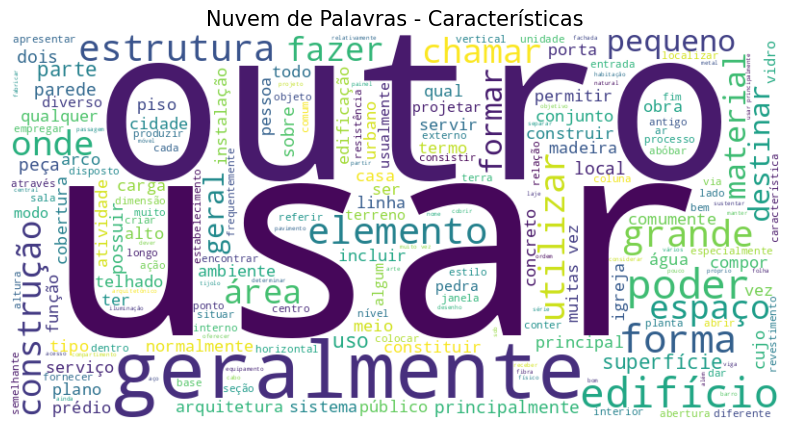

/tmp/ipython-input-2723889122.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x='Frequência', y='Palavra', palette='magma')


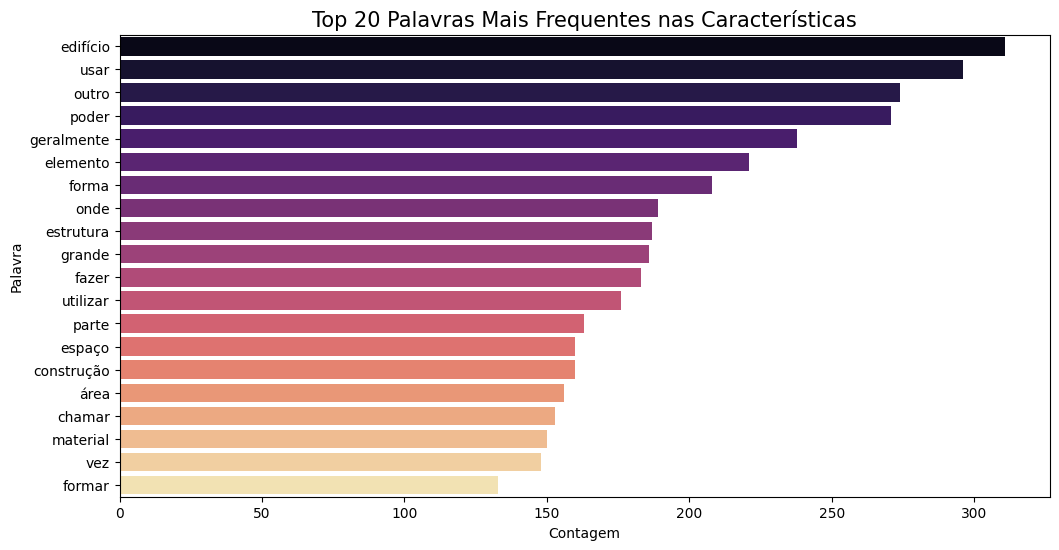

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

# 1. Preparar o texto consolidado
texto_completo = " ".join(df['características'].fillna("").astype(str))

# 2. Gerar a Nuvem de Palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Características', fontsize=15)
plt.show()

# 3. Gerar o Gráfico de Frequência (Top 20)
palavras = texto_completo.split()
contagem_palavras = Counter(palavras)
mais_comuns = contagem_palavras.most_common(20)

# Converter para DataFrame para facilitar a plotagem
df_freq = pd.DataFrame(mais_comuns, columns=['Palavra', 'Frequência'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_freq, x='Frequência', y='Palavra', palette='magma')
plt.title('Top 20 Palavras Mais Frequentes nas Características', fontsize=15)
plt.xlabel('Contagem')
plt.ylabel('Palavra')
plt.show()

In [ ]:
def analisar_gramatica(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return []

    # Processa o texto com o spaCy
    doc = nlp(str(texto))

    # Retorna uma lista de tuplas: (Palavra, Classe Gramatical)
    # token.pos_ fornece a classe gramatical simplificada (Universal POS tags)
    return [(token.text, token.pos_) for token in doc]

print("Iniciando a análise sintática das características... Por favor, aguarde.")

# Aplica a função à coluna 'características'
df['Análise_Sintática'] = df['características'].apply(analisar_gramatica)

print("Análise concluída com sucesso!")

# Exibe o Termo e o resultado da análise para os primeiros itens
# Dica: NOUN = Substantivo, VERB = Verbo, ADJ = Adjetivo, etc.
display(df[['Termo', 'Análise_Sintática']].head(10))

Iniciando a análise sintática das características... Por favor, aguarde.
Análise concluída com sucesso!


,Termo,Análise_Sintática
0,abadias,"[( , SPACE), (mosteiro, NOUN), (convento, NOUN..."
1,abastecimento de água,"[(conjunto, NOUN), (infraestrutura, ADJ), (ins..."
2,abastecimento de alimentos,"[(abastecimento, NOUN), (alimentar, ADJ), (eng..."
3,abertura,"[(qualquer, DET), (afastamento, NOUN), (volume..."
4,abertura zenital,"[(iluminação, NOUN), (fazer, VERB), (meio, NUM..."
5,abóbadas,"[( , SPACE), (estrutura, NOUN), (arquear, VERB..."
6,abóbadas abatidas,"[(abóbar, VERB), (berço, NOUN), (cujo, PRON), ..."
7,abóbadas alteadas,"[(abóbadade, NOUN), (berço, NOUN), (cujo, DET)..."
8,abóbadas caracol,"[(abóbar, VERB), (esférico, ADJ), (cúpula, VER..."
9,abóbadas de aresta,"[(formar, VERB), (encontro, NOUN), (quatro, NU..."


In [ ]:
def extrair_por_pos(lista_analise, pos_tag):
    """Filtra e junta palavras de uma tag específica."""
    if not isinstance(lista_analise, list):
        return ""
    return " ".join([palavra for palavra, tag in lista_analise if tag == pos_tag])

# Criando as colunas específicas para cada classe gramatical
df['substantivo (noun)'] = df['Análise_Sintática'].apply(lambda x: extrair_por_pos(x, 'NOUN'))
df['verbo (verb)'] = df['Análise_Sintática'].apply(lambda x: extrair_por_pos(x, 'VERB'))
df['adjetivo (adjective)'] = df['Análise_Sintática'].apply(lambda x: extrair_por_pos(x, 'ADJ'))

# Exibindo uma amostra dos resultados
print("Colunas gramaticais criadas com sucesso!")
display(df[['Termo', 'substantivo (noun)', 'verbo (verb)', 'adjetivo (adjective)']].head(10))

Colunas gramaticais criadas com sucesso!


,Termo,substantivo (noun),verbo (verb),adjetivo (adjective)
0,abadias,mosteiro convento mosteiro abade freira,morar monja cumprir designar montar governar o...,independente
1,abastecimento de água,conjunto instalação abastecimento água ligação...,consistir levar,infraestrutura necessário público predial resp...
2,abastecimento de alimentos,abastecimento comercialização soberania segura...,vista promover garantir produzir chegar,alimentar engloba alimentar nutricional forma ...
3,abertura,afastamento recorte elemento espaço porta deno...,volume peça parte peça propiciar parede parede,elemento rasgo quebra
4,abertura zenital,iluminação abertura iluminação teto abertura,fazer fornecir claraboia,teto natural meio
5,abóbadas,estrutura tijolo forma cobertura espaço estrutura,arquear construir alvenaria formar,concreto teto total
6,abóbadas abatidas,berço flecha raio altura distância,abóbar círculo utilizar,pequeno pequeno
7,abóbadas alteadas,abóbadade berço seção forma eixo,chamar abóbar,transversal largura
8,abóbadas caracol,arco superfície eixo degrau,abóbar cúpula formar girar resultar chamar abó...,esférico cocleário espiral
9,abóbadas de aresta,encontro berço intersecção abóbar,formar cruzar resultar,luneta igual


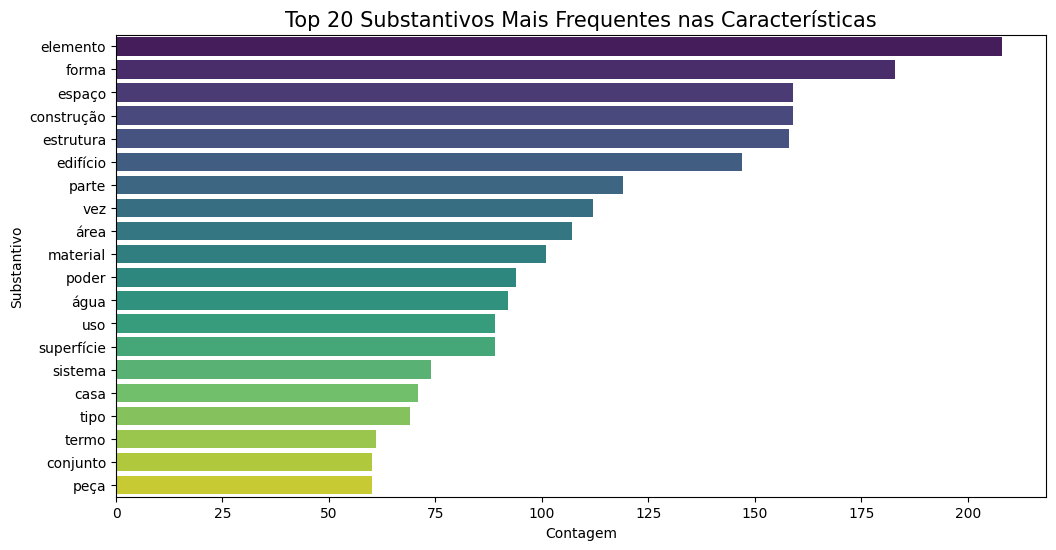

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# 1. Preparar o texto consolidado apenas com substantivos
texto_substantivos = " ".join(df['substantivo (noun)'].fillna("").astype(str))

# 2. Gerar a contagem de frequência
palavras_sub = texto_substantivos.split()
contagem_sub = Counter(palavras_sub)
mais_comuns_sub = contagem_sub.most_common(20)

# 3. Criar DataFrame para plotagem
df_freq_sub = pd.DataFrame(mais_comuns_sub, columns=['Substantivo', 'Frequência'])

# 4. Gerar o Gráfico de Barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_freq_sub, x='Frequência', y='Substantivo', palette='viridis', hue='Substantivo', legend=False)
plt.title('Top 20 Substantivos Mais Frequentes nas Características', fontsize=15)
plt.xlabel('Contagem')
plt.ylabel('Substantivo')
plt.show()

In [ ]:
palavras_alvo = ['elemento', 'forma', 'espaço', 'construção', 'estrutura', 'edifício']

def contem_palavra_alvo(texto):
    if pd.isna(texto):
        return False
    texto_lower = str(texto).lower()
    # Verifica se pelo menos uma das palavras está no texto
    return any(palavra in texto_lower for palavra in palavras_alvo)

# Aplicar a verificação em cada linha
total_termos = len(df)
termos_com_palavras = df['características'].apply(contem_palavra_alvo).sum()

probabilidade = (termos_com_palavras / total_termos) * 100

print(f"--- Análise de Probabilidade ---")
print(f"Total de termos no dataset: {total_termos}")
print(f"Termos que contêm ao menos uma das palavras alvo: {termos_com_palavras}")
print(f"Probabilidade de ocorrência: {probabilidade:.2f}%")

--- Análise de Probabilidade ---
Total de termos no dataset: 1216
Termos que contêm ao menos uma das palavras alvo: 675
Probabilidade de ocorrência: 55.51%


In [ ]:
def contar_palavras(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return 0
    return len(str(texto).split())

total_substantivos = df['substantivo (noun)'].apply(contar_palavras).sum()
total_verbos = df['verbo (verb)'].apply(contar_palavras).sum()
total_adjetivos = df['adjetivo (adjective)'].apply(contar_palavras).sum()

print("--- Contagem Total de Classes Gramaticais ---")
print(f"Total de Substantivos: {total_substantivos}")
print(f"Total de Verbos: {total_verbos}")
print(f"Total de Adjetivos: {total_adjetivos}")

--- Contagem Total de Classes Gramaticais ---
Total de Substantivos: 9757
Total de Verbos: 7889
Total de Adjetivos: 6968


In [ ]:
# 1. Calcular a contagem individual para cada linha
df['count_substantivos'] = df['substantivo (noun)'].apply(contar_palavras)
df['count_verbos'] = df['verbo (verb)'].apply(contar_palavras)
df['count_adjetivos'] = df['adjetivo (adjective)'].apply(contar_palavras)

# 2. Calcular a média global
media_substantivos = df['count_substantivos'].mean()
media_verbos = df['count_verbos'].mean()
media_adjetivos = df['count_adjetivos'].mean()

print("--- Média de Classes Gramaticais por Termo ---")
print(f"Média de Substantivos: {media_substantivos:.2f}")
print(f"Média de Verbos: {media_verbos:.2f}")
print(f"Média de Adjetivos: {media_adjetivos:.2f}")

# Exibir os top 5 termos com mais substantivos apenas para conferência
display(df[['Termo', 'count_substantivos', 'count_verbos', 'count_adjetivos']].head())

--- Média de Classes Gramaticais por Termo ---
Média de Substantivos: 8.02
Média de Verbos: 6.49
Média de Adjetivos: 5.73


,Termo,count_substantivos,count_verbos,count_adjetivos
0,abadias,5,9,1
1,abastecimento de água,9,2,14
2,abastecimento de alimentos,7,5,7
3,abertura,9,7,3
4,abertura zenital,5,3,3


In [ ]:
# Baixando os recursos necessários para o WordNet e suporte multilíngue (OMW)
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Pacotes 'wordnet' e 'omw-1.4' baixados e importados com sucesso!")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Pacotes 'wordnet' e 'omw-1.4' baixados e importados com sucesso!


In [ ]:
# 1. Definir as categorias lexicais de interesse
categorias_alvo = ['noun.person', 'noun.animal', 'noun.artifact', 'verb', 'adj']

lista_dados = []

# 2. Iterar por todos os synsets e filtrar pelas categorias
print("Extraindo lemas em português... Isso pode levar alguns segundos.")
for synset in wordnet.all_synsets():
    lexname = synset.lexname()

    # Identificar se o synset pertence a uma das categorias (direto ou subcategoria)
    categoria_encontrada = None
    for cat in categorias_alvo:
        if lexname == cat or lexname.startswith(cat + '.'):
            categoria_encontrada = cat
            break

    if categoria_encontrada:
        # Extrair lemas traduzidos para o português
        lemas_pt = synset.lemma_names('por')
        for lema in lemas_pt:
            lista_dados.append({
                "Palavra": lema.replace('_', ' '),
                "Categoria": categoria_encontrada,
                "Definição_Original": synset.definition()
            })

# 3. Criar o DataFrame e remover duplicatas
df_wordnet = pd.DataFrame(lista_dados).drop_duplicates(subset=['Palavra', 'Categoria'])



Extraindo lemas em português... Isso pode levar alguns segundos.


In [ ]:
# 1. Update the list of target lexical categories
categorias_alvo = ['noun.person', 'noun.animal', 'noun.artifact', 'noun.location', 'verb', 'adj']

# 2. Initialize an empty list for the newly extracted data
lista_dados_atualizada = []

# 3. Iterate through all WordNet synsets
print("Starting fresh scan of WordNet for Portuguese terms...")
for synset in wordnet.all_synsets():
    lexname = synset.lexname()

    # 4. Check if the lexical name matches or starts with target categories
    categoria_encontrada = None
    for cat in categorias_alvo:
        if lexname == cat or lexname.startswith(cat + '.'):
            categoria_encontrada = cat
            break

    if categoria_encontrada:
        # 5. Extract Portuguese lemmas
        lemas_pt = synset.lemma_names('por')

        # 6. Append dictionary with cleaned word, category, and definition
        for lema in lemas_pt:
            lista_dados_atualizada.append({
                "Palavra": lema.replace('_', ' '),
                "Categoria": categoria_encontrada,
                "Definição_Original": synset.definition()
            })

# 7. Convert to DataFrame and remove duplicates
df_wordnet_atualizado = pd.DataFrame(lista_dados_atualizada).drop_duplicates(subset=['Palavra', 'Categoria'])

# 8. Print the total count of terms successfully extracted
print(f"Scan complete! Total of terms successfully extracted: {len(df_wordnet_atualizado)}")
display(df_wordnet_atualizado.head(10))

Starting fresh scan of WordNet for Portuguese terms...
Scan complete! Total of terms successfully extracted: 29595


,Palavra,Categoria,Definição_Original
0,capaz,adj,(usually followed by `to') having the necessar...
1,incapaz,adj,(usually followed by `to') not having the nece...
2,dorsal,adj,facing away from the axis of an organ or organism
3,emergente,adj,coming into existence
4,parturienta,adj,giving birth
5,moribundo,adj,being on the point of death; breathing your last
6,abreviado,adj,(used of texts) shortened by condensing or rew...
7,absoluto,adj,perfect or complete or pure
8,perfeito,adj,perfect or complete or pure
9,implícito,adj,being without doubt or reserve


In [ ]:
# 1. Filter and display a sample of 'noun.location' to validate
print("Sample of extracted 'noun.location' terms:")
sample_location = df_wordnet_atualizado[df_wordnet_atualizado['Categoria'] == 'noun.location'].head(10)
display(sample_location)

# 2. Calculate the distribution for the updated categories
contagem_atualizada = df_wordnet_atualizado['Categoria'].value_counts()

Sample of extracted 'noun.location' terms:


,Palavra,Categoria,Definição_Original
19055,aqui,noun.location,the present location; this place
19056,cá,noun.location,the present location; this place
19057,lugar,noun.location,the location (metaphorically speaking) where s...
19058,base,noun.location,the place where you are stationed and from whi...
19059,endereço,noun.location,the place where a person or organization can b...
19060,distrito administrativo,noun.location,a district defined for administrative purposes
19061,divisão administrativa,noun.location,a district defined for administrative purposes
19062,divisão territorial,noun.location,a district defined for administrative purposes
19063,ágora,noun.location,the marketplace in ancient Greece
19064,rota aérea,noun.location,a designated route followed by airplanes in fl...


In [ ]:
# 1. Create sets for fast lookup based on semantic categories
set_objetos = set(df_wordnet_atualizado[df_wordnet_atualizado['Categoria'] == 'noun.artifact']['Palavra'].unique())
set_pessoas = set(df_wordnet_atualizado[df_wordnet_atualizado['Categoria'] == 'noun.person']['Palavra'].unique())
set_lugares = set(df_wordnet_atualizado[df_wordnet_atualizado['Categoria'] == 'noun.location']['Palavra'].unique())

# 2. Verification of set sizes
print(f"Tamanho do set_objetos (Artefatos): {len(set_objetos)}")
print(f"Tamanho do set_pessoas (Pessoas): {len(set_pessoas)}")
print(f"Tamanho do set_lugares (Lugares): {len(set_lugares)}")

# 3. Display small samples for validation
print("\nAmostra de Objetos:", list(set_objetos)[:5])
print("Amostra de Pessoas:", list(set_pessoas)[:5])
print("Amostra de Lugares:", list(set_lugares)[:5])

Tamanho do set_objetos (Artefatos): 5775
Tamanho do set_pessoas (Pessoas): 7973
Tamanho do set_lugares (Lugares): 3232

Amostra de Objetos: ['Balão barragem', 'autocarro', 'asa', 'consulado', 'carpete']
Amostra de Pessoas: ['Frederick Douglass', 'Stephen leacock', 'Cipião Africano', 'senador', 'visigodos']
Amostra de Lugares: ['campo', 'Ilhas Faroe', 'Roanoke', 'Basseterre', 'Sheffield']


In [ ]:
# 1. Initialize main lists
list_verbos = []
list_adjetivos = []
list_objetos = []
list_pessoas = []
list_lugares = []

# 2. Iterate through syntactic analysis
# Corrigido: Usando a coluna correta do DataFrame 'df'
for doc in df['Análise_Sintática']:
    temp_v = []
    temp_a = []
    temp_obj = []
    temp_pes = []
    temp_lug = []

    # Corrigido: Cada item em 'doc' é uma tupla (texto, tag)
    for word, pos in doc:
        text_lower = word.lower()

        # Verbs and Auxiliaries
        if pos in ('VERB', 'AUX'):
            temp_v.append(word)

        # Adjectives
        elif pos == 'ADJ':
            temp_a.append(word)

        # Nouns and Proper Nouns with Semantic Filtering
        elif pos in ('NOUN', 'PROPN'):
            if text_lower in set_objetos:
                temp_obj.append(word)
            if text_lower in set_pessoas:
                temp_pes.append(word)
            if text_lower in set_lugares:
                temp_lug.append(word)

    # 4. Join and append
    list_verbos.append(" ".join(temp_v))
    list_adjetivos.append(" ".join(temp_a))
    list_objetos.append(" ".join(temp_obj))
    list_pessoas.append(" ".join(temp_pes))
    list_lugares.append(" ".join(temp_lug))

# 5. Assign to new columns in df (Corrigido de df_selecionado)
df['verbos'] = list_verbos
df['adjetivos'] = list_adjetivos
df['objetos_wordnet'] = list_objetos
df['pessoas_wordnet'] = list_pessoas
df['lugares_wordnet'] = list_lugares

print("Semantic and grammatical columns created successfully in 'df'!")
display(df[['Termo', 'verbos', 'adjetivos', 'objetos_wordnet', 'pessoas_wordnet', 'lugares_wordnet']].head())

Semantic and grammatical columns created successfully in 'df'!


,Termo,verbos,adjetivos,objetos_wordnet,pessoas_wordnet,lugares_wordnet
0,abadias,morar monja cumprir designar montar governar o...,independente,mosteiro convento mosteiro,abade freira,
1,abastecimento de água,consistir levar,infraestrutura necessário público predial resp...,instalação ligação instrumento,,
2,abastecimento de alimentos,vista promover garantir produzir chegar,alimentar engloba alimentar nutricional forma ...,,trabalhador,
3,abertura,volume peça parte peça propiciar parede parede,elemento rasgo quebra,porta abertura superfície,,superfície
4,abertura zenital,fazer fornecir claraboia,teto natural meio,abertura teto abertura,,


In [ ]:
# Salvar o DataFrame completo e atualizado em um arquivo Excel
nome_arquivo_final = 'df_arquitetura_completo_final.xlsx'
df.to_excel(nome_arquivo_final, index=False)

print(f"Arquivo '{nome_arquivo_final}' gerado com sucesso!")

# Iniciar o download
from google.colab import files
files.download(nome_arquivo_final)

Arquivo 'df_arquitetura_completo_final.xlsx' gerado com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>